# Optimizing-Agricultural-Production
## Problem Statement -
Building a Predictive Model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

## Goal -
To achieve precision farming by optimizing the agricultural production.
The project is intended on Precision Farming.

➔ To Optimize Productivity

➔ By Understanding requirements of climatic and soil conditions for crops.

➔ Helps us to Cope up with weather unpredictability.

## About The Dataset Used (data.csv) -
The Dataset Consists of 22 Unique Crops such as Maize, Wheat, Mango, Watermelon, Mango etc.

➔ The dataset consists of climatic conditions required to grow the crops.

   ◆ Temperature, Humidity, Rainfall.

➔ The dataset also consists of soil conditions required to grow the crops

   ◆ N: The Ratio of Nitrogen Content in Soil.
   
   ◆ P: The Ratio of Phosphorus Content in Soil.
   
   ◆ K: The Ratio of Potassium Content in Soil.
   
   ◆ pH: pH of the Soil
   
   
   ## Libraries Used In The Project -
   
● Numpy: Used for Mathematical Operations.

● Pandas: Used for DataFrame Operations.

● Seaborn and Matplotlib: Used for Data Visualizations.

● Ipywidgets: Used for Interactive Analysis.

● Sklearn: Used for Machine Learning Algorithms

   ## Steps of the algorithms
1- Understanding the Dataset.

2- Understanding the Problem Statement.

3- Performing Descriptive Statistics.

4- Clustering Similar Crops.

5- Visualizing the Hidden Patterns.

6- Building a Machine Learning Classification Model.


In [60]:
#libarary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading the Dataset.
data = pd.read_csv ('data.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [5]:
#Checking the missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
#Checking the crops present
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#Checking average climatic and soil requirements
data['temperature'].describe()

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64

In [9]:
#Checking the detailed statistics for each crop
list = [ 'N' , 'P' , 'K', 'temperature' , 'humidity' , 'ph' , 'rainfall']
list

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [10]:
data[data['label']=="rice"][list].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
std,11.917981,7.904966,2.946167,2.031272,1.418381,0.768692,34.291825
min,60.000000,35.000000,35.000000,20.045414,80.122675,5.005307,182.561632
25%,69.000000,41.000000,38.000000,21.927064,80.952094,5.869992,204.334023
50%,80.000000,47.000000,40.000000,23.734837,82.189357,6.363804,233.119859
75%,91.000000,54.250000,42.000000,25.513702,83.470254,7.039147,264.126903
max,99.000000,60.000000,45.000000,26.929951,84.969072,7.868475,298.560117


In [11]:
data[data['label']=="rice"][list].mean()

N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64

In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [27]:
#Comparing Average requirement and conditions for each crop
import ipywidgets as widgets
from ipywidgets import interact
@interact
def newdata (conditions=['N','P','K','temperature','humidity','ph','rainfall']) :
    print (" average of a certain crop for the " , conditions )
    for i in data['label'].unique():
        print ( data[data['label']==i][conditions].mean())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [34]:
#Checking the below and above Average Conditions
from ipywidgets import interact
@interact
def newdata (conditions=['N','P','K','temperature','humidity','ph','rainfall']) :
    print (" - crops are above for the " , conditions , " \n " , data[data[conditions] >= data[conditions].mean()]['label'].unique(), '\n')
    print (" - crops are below for the " , conditions , " \n " , data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

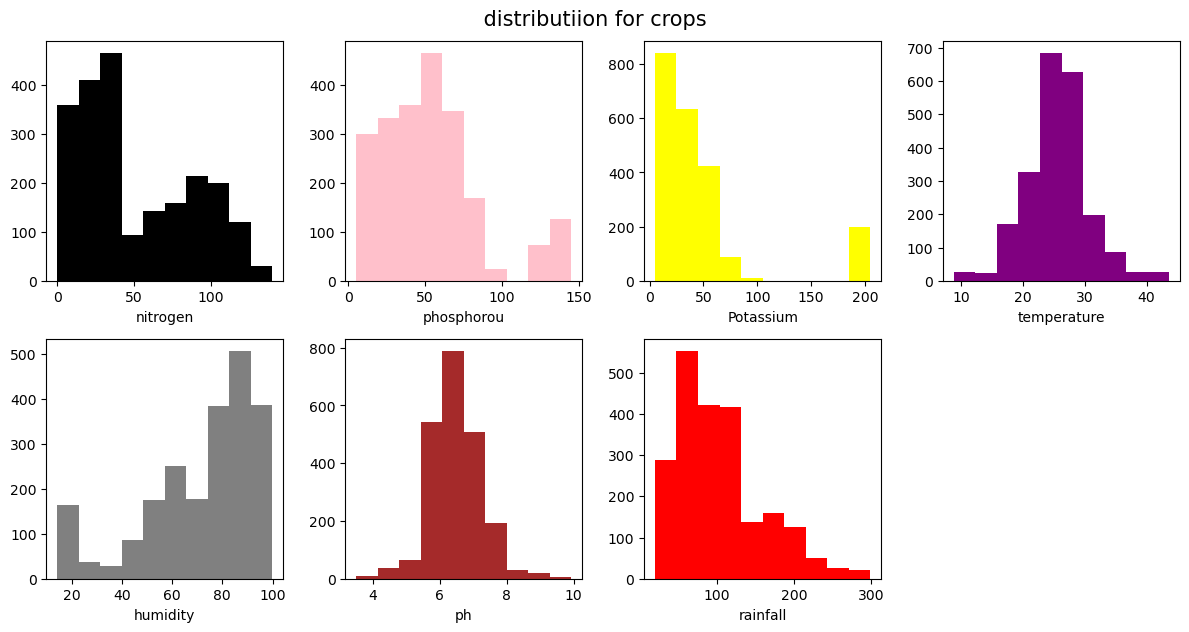

In [43]:
#Checking distributiion for each crop
figh = plt.figure(figsize= (12,9))

plt.subplot (3,4,1)
plt.hist(data['N'], color = 'Black')
plt.xlabel('nitrogen')

plt.subplot (3,4,2)
plt.hist(data['P'], color = 'pink')
plt.xlabel('phosphorou')

plt.subplot (3,4,3)
plt.hist(data['K'], color = 'yellow')
plt.xlabel('Potassium')

plt.subplot (3,4,4)
plt.hist(data['temperature'], color = 'purple')
plt.xlabel('temperature')

plt.subplot (3,4,5)
plt.hist(data['humidity'], color = 'Grey')
plt.xlabel('humidity')

plt.subplot (3,4,6)
plt.hist(data['ph'], color = 'Brown')
plt.xlabel('ph')

plt.subplot (3,4,7)
plt.hist(data['rainfall'], color = 'Red')
plt.xlabel('rainfall')

plt.suptitle ( ' distributiion for crops ' , fontsize = 15)
plt.tight_layout ()
plt.show()


In [44]:
#Checking that crops those have unusual requirements
print ('are unusual requirements for Nitrogen ' , data[data['N'] > 120 ]['label'].unique())
print ('are unusual requirements for Phosphorus' , data[data['P'] > 100 ]['label'].unique())
print ('are unusual requirements for Potassium ' , data[data['K'] > 200 ]['label'].unique())
print ('are unusual requirements for temperature ' ,data[data['temperature'] < 10 ]['label'].unique())
print ('are unusual requirements for temperature ' , data[data['temperature'] > 40 ]['label'].unique())
print ('are unusual requirements for PH ' ,data[data['ph'] < 4  ]['label'].unique())
print ('are unusual requirements for PH ' ,data[ data['ph'] > 9 ]['label'].unique())
print ('are unusual requirements for humidity ' ,data[data['humidity'] < 20 ]['label'].unique())
print ('are unusual requirements for rainfall ' , data[data['rainfall'] > 200 ]['label'].unique())

are unusual requirements for Nitrogen  ['cotton']
are unusual requirements for Phosphorus ['grapes' 'apple']
are unusual requirements for Potassium  ['grapes' 'apple']
are unusual requirements for temperature  ['grapes']
are unusual requirements for temperature  ['grapes' 'papaya']
are unusual requirements for PH  ['mothbeans']
are unusual requirements for PH  ['mothbeans']
are unusual requirements for humidity  ['chickpea' 'kidneybeans']
are unusual requirements for rainfall  ['rice' 'papaya' 'coconut']


In [45]:
#Checking which crop to be grown according to the season
print(" crop to be grown in summer season ", data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print(" crop to be grown in winter season ", data[(data['temperature'] < 20 ) & (data['humidity'] >  30 )]['label'].unique())
print(" crop to be grown in moonsoon season " , data[(data['rainfall'] > 200 ) & (data['humidity'] > 30  )]['label'].unique())

 crop to be grown in summer season  ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
 crop to be grown in winter season  ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
 crop to be grown in moonsoon season  ['rice' 'papaya' 'coconut']


In [46]:
labels_to_remove = ['label']
features = data.drop(labels=labels_to_remove, axis=1)
features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

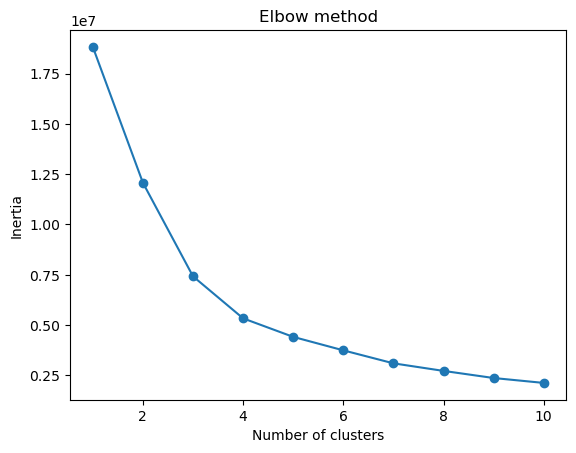

In [47]:
# elbow method to determine the appropriate clusters number 

from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(features)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("...........................................")

print("Crops in second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("...........................................")

print("Crops in third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("...........................................")

print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())
print("...........................................")

C:\Users\zahra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
...........................................
Crops in second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
...........................................
Crops in third Cluster: ['grapes' 'apple']
...........................................
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
...........................................


In [49]:
#Splitting the Dataset for predictive modelling
label = data['label']
features = data.drop(labels = ['label'] , axis=1)
features


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [50]:
label

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [51]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split ( features ,label , test_size = 0.2 , random_state= 0 )

In [53]:
#Creating a Predictive Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression ()
model.fit (x_train ,y_train  )
print (model.score (x_train ,y_train  ))

0.9693181818181819


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
y_pred = model.predict (x_test)
print (y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'jute'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'kidneybeans' 'pomegranate' 'rice' 'maize'
 'muskmelon' 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'mothbeans'
 'maize' 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'mothbeans' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize

In [55]:
import seaborn as sns

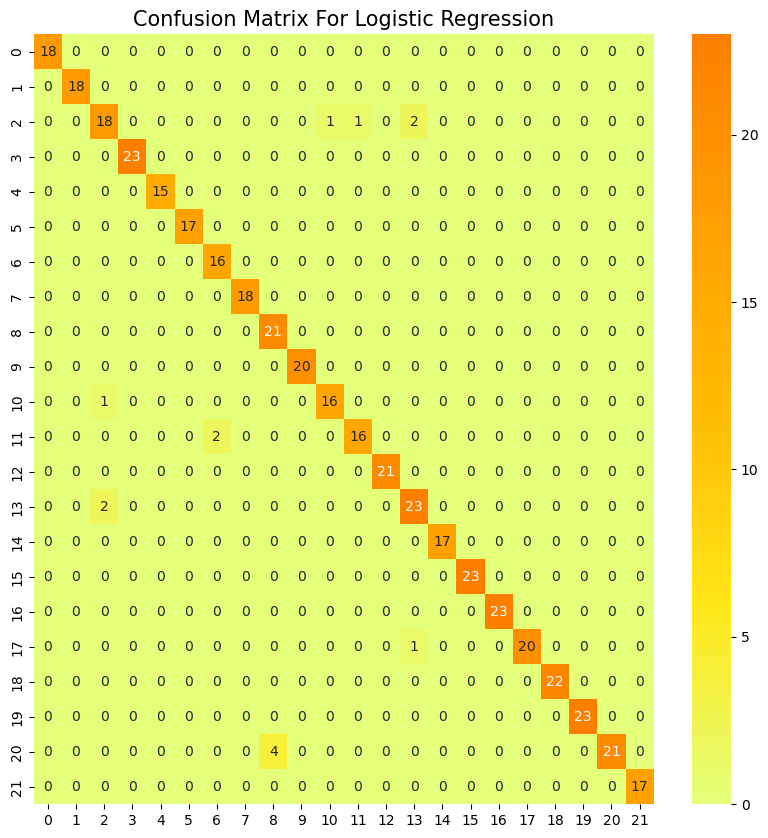

In [56]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [57]:
#Defining the classification Report
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [58]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [61]:
prediction = model.predict (np.array ([[90 , 42 ,43 , 20.879744 ,82.002744 ,  6.502985 , 202.935536  ]]))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [62]:
# RandomForestClassifier model 
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier ()
model2.fit (x_train ,y_train )
print (model2.score(x_train ,y_train ))

1.0


In [63]:
y_pred = model2.predict (x_test)
print (y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'rice'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'kidneybeans' 'pomegranate' 'rice' 'maize'
 'muskmelon' 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'mothbeans'
 'maize' 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'blackgram' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize

In [64]:
print (model2.score (x_test ,y_pred ))

1.0


In [65]:
prediction = model2.predict (np.array ([[90 , 42 ,43 , 20.879744 ,82.002744 ,  6.502985 , 202.935536  ]]))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
# SVC model 
from sklearn.svm import SVC
sv = SVC ()
sv.fit (x_train ,y_train )
print (sv.score(x_train ,y_train ))

0.9767045454545454


In [69]:
print (sv.score(x_train ,y_train ))

0.9767045454545454


In [70]:
y_pred = sv.predict (x_test)
print (y_pred)

['watermelon' 'watermelon' 'grapes' 'chickpea' 'blackgram' 'jute'
 'mothbeans' 'kidneybeans' 'muskmelon' 'banana' 'mothbeans' 'coffee'
 'lentil' 'mungbean' 'mango' 'apple' 'coffee' 'lentil' 'coffee' 'mango'
 'coconut' 'blackgram' 'kidneybeans' 'jute' 'cotton' 'coffee' 'lentil'
 'orange' 'mothbeans' 'kidneybeans' 'pomegranate' 'rice' 'maize'
 'muskmelon' 'coconut' 'cotton' 'mango' 'mango' 'watermelon' 'blackgram'
 'maize' 'blackgram' 'pigeonpeas' 'watermelon' 'pigeonpeas' 'mungbean'
 'kidneybeans' 'kidneybeans' 'cotton' 'mungbean' 'mothbeans' 'blackgram'
 'apple' 'muskmelon' 'pigeonpeas' 'banana' 'papaya' 'mango' 'lentil'
 'cotton' 'orange' 'mungbean' 'watermelon' 'rice' 'muskmelon' 'apple'
 'grapes' 'coffee' 'apple' 'orange' 'coconut' 'pomegranate' 'kidneybeans'
 'maize' 'grapes' 'mothbeans' 'chickpea' 'maize' 'jute' 'mango' 'rice'
 'blackgram' 'watermelon' 'watermelon' 'muskmelon' 'cotton' 'maize'
 'lentil' 'mothbeans' 'papaya' 'blackgram' 'jute' 'mungbean' 'grapes'
 'mungbean' 'maize

In [71]:
prediction = sv.predict (np.array ([[90 , 42 ,43 , 20.879744 ,82.002744 ,  6.502985 , 202.935536  ]]))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['jute']


C:\Users\zahra\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [73]:

from sklearn.metrics import confusion_matrix
model3 = confusion_matrix ( y_test , y_pred)
print ("confusion matrix \n " , '\n ',model3 )

confusion matrix 
  
  [[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0 

In [74]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.78      1.00      0.88        21
 kidneybeans       0.87      1.00      0.93        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    